In [10]:
import sys

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

sys.path.append("../../../code/ndsvae/")
import ndsvae as ndsv

sys.path.append("..")
import plot
import util

%matplotlib inline

In [2]:
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.sans-serif'] = "Arial"

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [43]:
def plot_scfc(testcase, modelname, config, runs, imgfile, fclim=(-1,1)):
    run = util.select_run(testcase, modelname, config, [0,1])
    ds = ndsv.Dataset.from_file(f"../run/main/{testcase}/dataset.npz")
    sims = ndsv.GeneratedData.from_file(f"../run/main/{testcase}/model{modelname}/{config}/run{run:02d}/simulations.npz")

    nsub, nreg, _, nt = ds.y.shape
    nsamples = sims.y.shape[0]

    fig = plt.figure(figsize=(7.5, 3.6), dpi=150)

    gs = gridspec.GridSpec(4, nsub+1, wspace=0.2, hspace=0.2, width_ratios=[1]*nsub+[0.2],
                          left=0.06, right=0.96, bottom=0.06, top=0.94)

    for i in range(nsub):
        plt.subplot(gs[0, i])
        im = plt.imshow(ds.w[i], vmin=0, vmax=1, cmap='viridis')
        plt.xticks([]); plt.yticks([]);
        plt.title(f"Subject {i+1}")
        if i == 0:
            plt.ylabel("SC")
        if i == nsub-1:
            plt.colorbar(im, cax=plt.subplot(gs[0,nsub]))


        plt.subplot(gs[1, i])
        fc = np.corrcoef(ds.y[i,:,0,:])
        plt.imshow(fc, vmin=fclim[0], vmax=fclim[1], cmap='bwr')
        plt.xticks([]); plt.yticks([]);
        if i == 0:
            plt.ylabel("FC data")


        plt.subplot(gs[2, i])
        fcex = np.corrcoef(sims.y[0,i,:,0,-nt:])
        im = plt.imshow(fcex, vmin=fclim[0], vmax=fclim[1], cmap='bwr')
        plt.xticks([]); plt.yticks([]);
        if i == 0:
            plt.ylabel("FC generated\n(example)")
        if i == nsub-1:
            plt.colorbar(im, cax=plt.subplot(gs[2,nsub]))        

        plt.subplot(gs[3, i])
        fcs = [np.corrcoef(sims.y[j,i,:,0,-nt:]) for j in range(nsamples)]
        plt.imshow(np.mean(fcs, axis=0), vmin=fclim[0], vmax=fclim[1], cmap='bwr')
        plt.xticks([]); plt.yticks([]);
        if i == 0:
            plt.ylabel("FC generated\n(mean)")

    bg = plot.Background(visible=False)
    plt.savefig(imgfile)

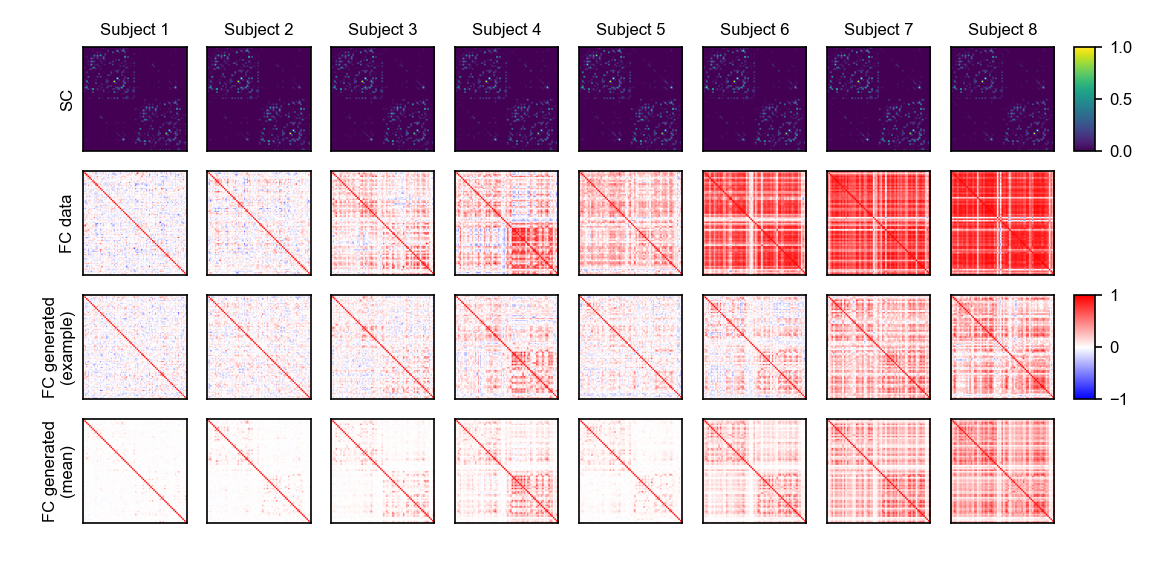

In [48]:
plot_scfc("hopf", "AN", "ns_2_mreg_2_msub_1_nf_32", [0,1], "./img/Fig_scfc-hopf.pdf")

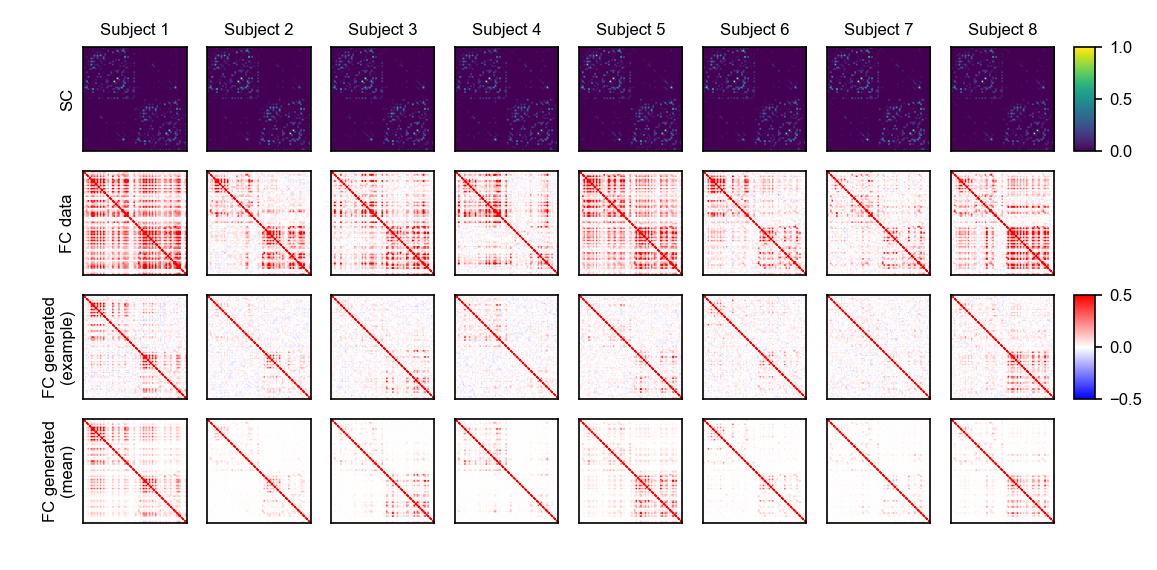

In [49]:
plot_scfc("pmfm_avg", "AN", "ns_2_mreg_2_msub_1_nf_32", [0,1], "./img/Fig_scfc-pmfm.pdf", fclim=(-0.5, 0.5))